In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Mount Google Drive (Assuming your dataset is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the path to your dataset
dataset_path = '/content/drive/My Drive/Alzheimer_Dataset'

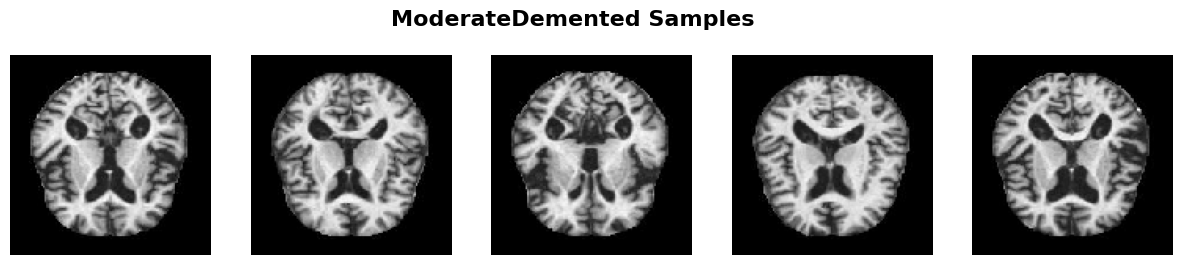

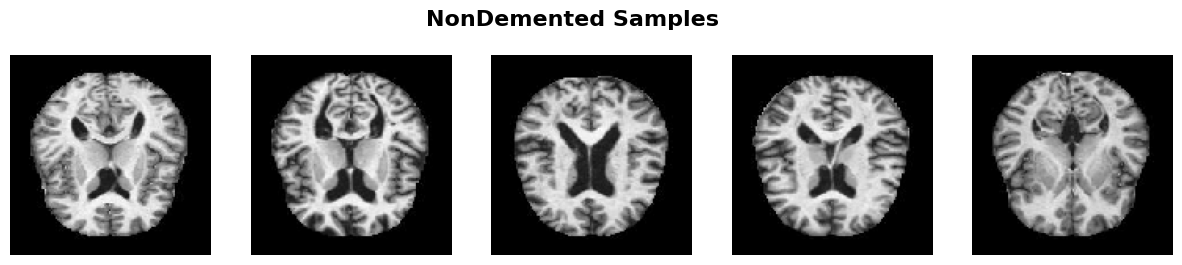

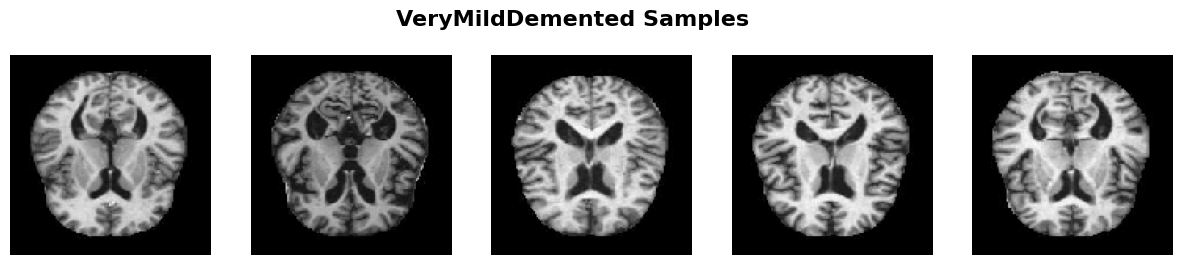

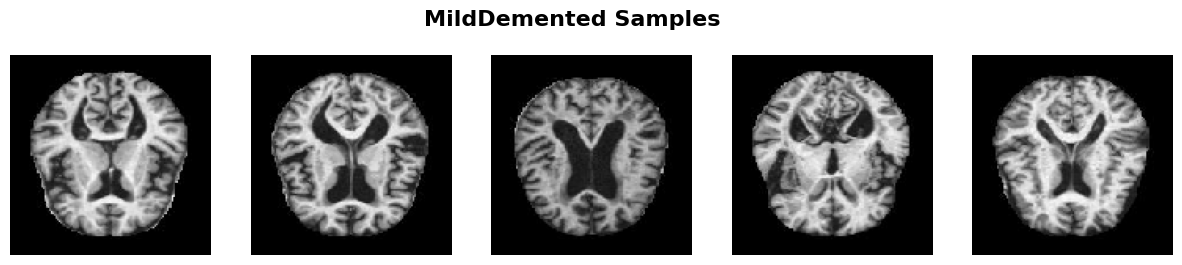

In [ ]:
# Display a few images from each class
class_names = os.listdir(os.path.join(dataset_path, 'train'))
num_samples = 5

for class_name in class_names:
    class_path = os.path.join(dataset_path, 'train', class_name)
    image_files = random.sample(os.listdir(class_path), num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f'{class_name} Samples', fontsize=16, fontweight='bold')

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

In [ ]:
# Function to load and preprocess the dataset
def load_dataset(batch_size=32, img_size=(128, 128)):
    train_data = tf.keras.preprocessing.image_dataset_from_directory(
        os.path.join(dataset_path, 'train'),
        batch_size=batch_size,
        image_size=img_size,
        shuffle=True,
        seed=42,
        label_mode='categorical'
    )

    test_data = tf.keras.preprocessing.image_dataset_from_directory(
        os.path.join(dataset_path, 'test'),
        batch_size=batch_size,
        image_size=img_size,
        shuffle=False,
        label_mode='categorical'
    )

    return train_data, test_data

In [ ]:
# Function to build the custom neural network model
def build_custom_model(input_shape, num_classes):
    model = Sequential()

    # Flatten the input if it's not already flattened
    model.add(Flatten(input_shape=input_shape))

    # Add dense layers
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Function to train the model
def train_model(model, train_data, val_data, epochs=20):
    checkpoint_filepath = '/content/drive/My Drive/model_checkpoint'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    callbacks = [model_checkpoint_callback, early_stopping]

    history = model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=callbacks)

    # Plotting loss and accuracy
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(history.epoch, history.history['loss'], label='Train Loss')
    ax[0].plot(history.epoch, history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].legend()

    ax[1].plot(history.epoch, history.history['accuracy'], label='Train Accuracy')
    ax[1].plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].legend()

    plt.show()

In [ ]:
# Function to evaluate the model
def evaluate_model(model, test_data):
    result = model.evaluate(test_data)
    print(f'Test Loss: {result[0]}, Test Accuracy: {result[1]}')

In [ ]:
# Function to display metrics and confusion matrix
def display_metrics_and_confusion_matrix(model, test_data, class_names):
    predictions = []
    true_labels = []

    for images, labels in test_data:
        predictions.extend(np.argmax(model.predict(images), axis=1))
        true_labels.extend(np.argmax(labels.numpy(), axis=1))

    # Display classification report
    print("Classification Report:")
    print(classification_report(true_labels, predictions, target_names=class_names))

    # Display confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Load and preprocess the dataset
batch_size = 32
img_size = (128, 128)
train_data, test_data = load_dataset(batch_size=batch_size, img_size=img_size)

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [ ]:
# Build the custom model
input_shape = (img_size[0], img_size[1], 3)  # Assuming 3 channels for color images
num_classes = len(class_names)
custom_model = build_custom_model(input_shape, num_classes)

Epoch 1/20
157/161 [============================>.] - ETA: 16s - loss: 666.5195 - accuracy: 0.4707
Epoch 1: val_accuracy improved from -inf to 0.34993, saving model to /content/drive/My Drive/model_checkpoint
161/161 [==============================] - 749s 4s/step - loss: 659.3525 - accuracy: 0.4716 - val_loss: 662.5528 - val_accuracy: 0.3499
Epoch 2/20
157/161 [============================>.] - ETA: 0s - loss: 207.4560 - accuracy: 0.5334
Epoch 2: val_accuracy improved from 0.34993 to 0.66003, saving model to /content/drive/My Drive/model_checkpoint
161/161 [==============================] - 17s 105ms/step - loss: 204.1145 - accuracy: 0.5366 - val_loss: 56.9860 - val_accuracy: 0.6600
Epoch 3/20
158/161 [============================>.] - ETA: 0s - loss: 65.8628 - accuracy: 0.6622
Epoch 3: val_accuracy improved from 0.66003 to 0.76430, saving model to /content/drive/My Drive/model_checkpoint
161/161 [==============================] - 17s 106ms/step - loss: 65.5566 - accuracy: 0.6628 - va

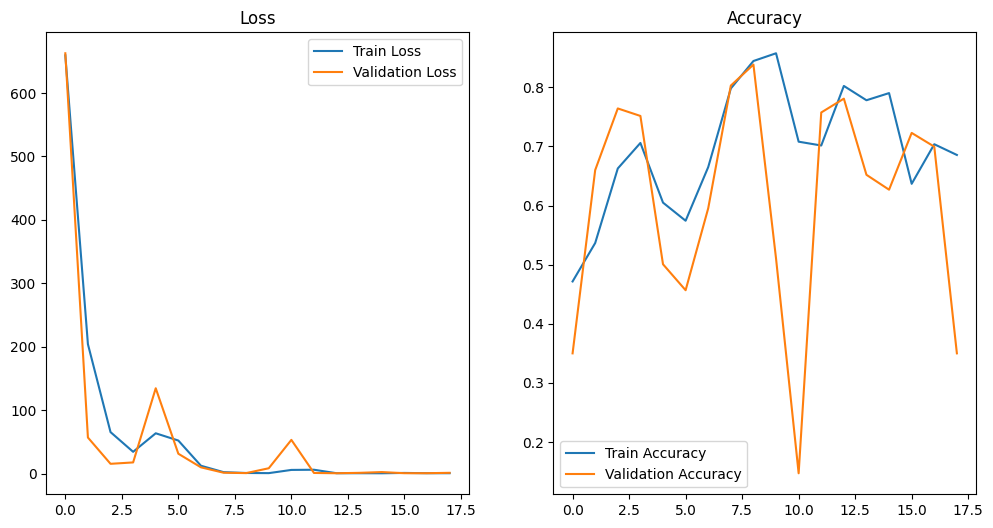

In [ ]:
# Train the custom model
train_model(custom_model, train_data, val_data=train_data, epochs=20)

In [ ]:
# Evaluate the custom model
evaluate_model(custom_model, test_data)

40/40 [==============================] - 294s 7s/step - loss: 1.4008 - accuracy: 0.3479
Test Loss: 1.4008426666259766, Test Accuracy: 0.34792807698249817


1/1 [==============================] - 0s 20ms/step
Classification Report:
                  precision    recall  f1-score   support

ModerateDemented       0.00      0.00      0.00       179
     NonDemented       0.00      0.00      0.00        12
VeryMildDemented       0.00      0.00      0.00       640
    MildDemented       0.35      0.99      0.52       448

        accuracy                           0.35      1279
       macro avg       0.09      0.25      0.13      1279
    weighted avg       0.12      0.35      0.18      1279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


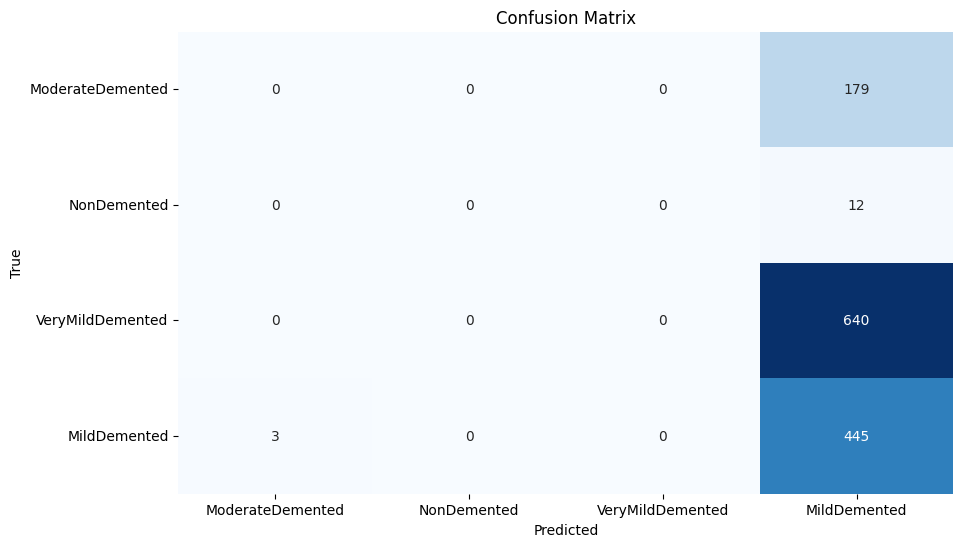

In [ ]:
import pandas as pd

# Display metrics and confusion matrix for the custom model
display_metrics_and_confusion_matrix(custom_model, test_data, class_names)

In [ ]:
# Save the custom model
custom_model.save('/content/drive/My Drive/Alzheimer_CustomDNN_Trained_Model.h5')